In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# CSV 파일에서 데이터 로드
file_path = '/content/drive/MyDrive/생명연구자원  AI 활용 경진대회/Dataset/train.csv'
data = pd.read_csv(file_path)

In [39]:
from sklearn.model_selection import train_test_split
_, sample_train = train_test_split(data, test_size=0.2, random_state=42, stratify= data.SUBCLASS)

In [40]:
sample_train.to_csv('/content/drive/MyDrive/생명연구자원  AI 활용 경진대회/Dataset/sample_train.csv', index=False)

# Import

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 학습데이터 불러오기

In [ ]:
# CSV 파일에서 데이터 로드
file_path = '/content/drive/MyDrive/생명연구자원  AI 활용 경진대회/Dataset/train.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX,SUBCLASS_encoded
0,TRAIN_0000,8,137,42,24,0,47,141,114,124,...,67,32,26,121,60,51,51,34,WT,8
1,TRAIN_0001,19,137,42,24,0,47,141,114,124,...,67,32,26,121,60,51,51,34,WT,19
2,TRAIN_0002,20,104,42,24,0,47,141,114,124,...,67,32,26,121,60,51,51,34,WT,20
3,TRAIN_0003,9,137,42,24,0,47,141,114,124,...,67,32,26,121,60,51,51,34,WT,9
4,TRAIN_0004,6,137,42,24,0,47,141,114,124,...,67,32,26,121,60,51,51,34,WT,6


In [ ]:
data.columns[2:]

Index(['A2M', 'AAAS', 'AADAT', 'AARS1', 'ABAT', 'ABCA1', 'ABCA2', 'ABCA3',
       'ABCA4', 'ABCA5',
       ...
       'ZNF292', 'ZNF365', 'ZNF639', 'ZNF707', 'ZNFX1', 'ZNRF4', 'ZPBP',
       'ZW10', 'ZWINT', 'ZYX'],
      dtype='object', length=4384)

# 전처리

In [ ]:
# 유전자 변이 정보(WT, 변이 등)를 숫자로 인코딩
# 여기서는 One-Hot Encoding 또는 Label Encoding을 사용할 수 있습니다.

# 우선 모든 유전자 열을 선택합니다.
gene_columns = data.columns[2:]  # ID, SUBCLASS 제외한 유전자 열

# 결측치 처리 (필요한 경우)
data[gene_columns] = data[gene_columns].fillna('Unknown')

# 모든 유전자 변이 상태를 Label Encoding
for col in gene_columns:
    data[col] = LabelEncoder().fit_transform(data[col])


In [ ]:
# SUBCLASS 열을 레이블 인코딩
label_encoder = LabelEncoder()
data['SUBCLASS_encoded'] = label_encoder.fit_transform(data['SUBCLASS'])

In [ ]:
# 입력 변수 X와 타겟 변수 y 설정
X = data[gene_columns].values
y = data['SUBCLASS_encoded'].values

# 타겟 변수를 One-Hot Encoding
y = to_categorical(y)

In [ ]:
# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구축

In [ ]:
# DNN 모델 정의
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습

In [ ]:
# EarlyStopping 콜백 설정 (과적합 방지)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0422 - loss: 166.7815 - val_accuracy: 0.1310 - val_loss: 17.1783
Epoch 2/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0629 - loss: 9.8717 - val_accuracy: 0.0565 - val_loss: 5.0106
Epoch 3/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0634 - loss: 4.3687 - val_accuracy: 0.0302 - val_loss: 4.5753
Epoch 4/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0709 - loss: 4.5674 - val_accuracy: 0.0685 - val_loss: 3.4914
Epoch 5/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0537 - loss: 3.2604 - val_accuracy: 0.0877 - val_loss: 3.2374
Epoch 6/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0961 - loss: 3.2301 - val_accuracy: 0.1310 - val_loss: 3.2157
Epoch 7/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1239 - loss: 3.2154 - val_accuracy: 0.1331 - val_loss: 3.2058
Epoch 8/100
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1339 - loss: 3.1997 - val_

# 모델 평가

In [ ]:
# 테스트 데이터로 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1167 - loss: 3.0981
Test Accuracy: 12.01%


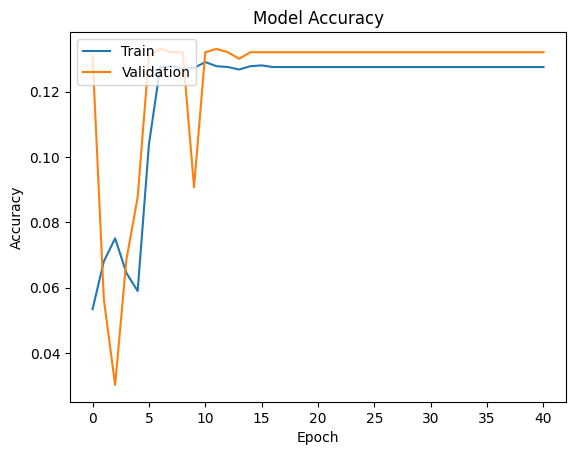

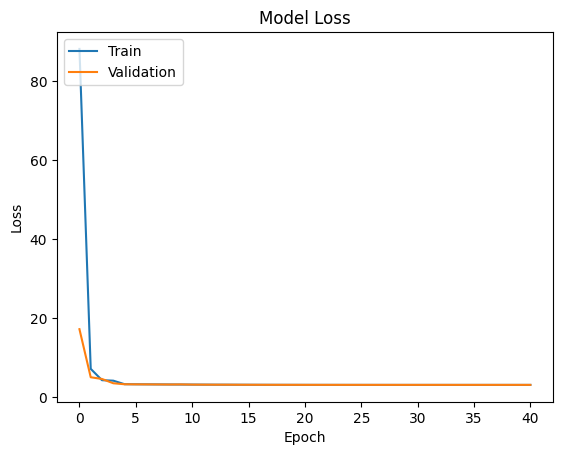

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 분류 보고서 출력
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# 혼동 행렬 출력
conf_mat = confusion_matrix(y_true, y_pred_classes)
print(conf_mat)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

         ACC       0.00      0.00      0.00        14
        BLCA       0.00      0.00      0.00        27
        BRCA       0.12      1.00      0.21       149
        CESC       0.00      0.00      0.00        31
        COAD       0.00      0.00      0.00        30
        DLBC       0.00      0.00      0.00        10
      GBMLGG       0.00      0.00      0.00       116
        HNSC       0.00      0.00      0.00        51
       KIPAN       0.00      0.00      0.00        86
        KIRC       0.00      0.00      0.00        54
        LAML       0.00      0.00      0.00        39
         LGG       0.00      0.00      0.00        49
        LIHC       0.00      0.00      0.00        34
        LUAD       0.00      0.00      0.00        37
        LUSC       0.00      0.00      0.00        39
          OV       0.00      0.00      0.00        58
        PAAD       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
